<a href="https://www.kaggle.com/code/faressayah/data-science-best-practices-with-pandas-part-3?scriptVersionId=119299208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

***

# 🚑 911 Calls Capstone Project


✔️ All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

✔️ First some basic questions:

> 1. From where the calls come most?
> 2. Which are top townships for calls?
> 3. How many unique title?
> 4. What is the reason for most calls?

✔️ Feature informations:
> * `lat` : String variable, Latitude
> * `lng`: String variable, Longitude
> * `desc`: String variable, Description of the Emergency Call
> * `zip`: String variable, Zipcode
> * `title`: String variable, Title
> * `timeStamp`: String variable, YYYY-MM-DD HH:MM:SS
> * `twp`: String variable, Township
> * `addr`: String variable, Address
> * `e`: String variable, Dummy variable (always 1)

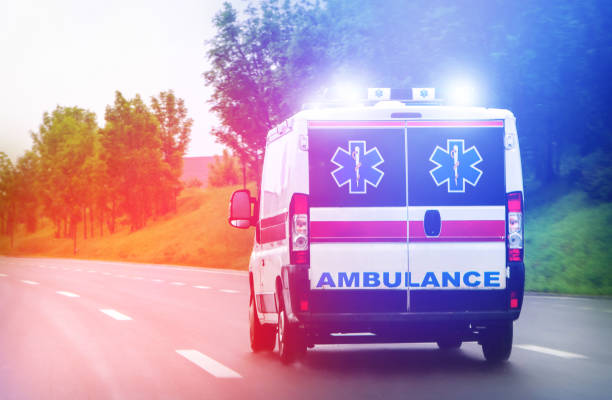

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 📂 Get the Data

In [2]:
data = pd.read_csv("/kaggle/input/montcoalert/911.csv")
column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
data.columns = column
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
data.drop('e', axis=1, inplace=True)

# 🔍 Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   latitude     663522 non-null  float64
 1   longitude    663522 non-null  float64
 2   description  663522 non-null  object 
 3   zipcode      583323 non-null  float64
 4   title        663522 non-null  object 
 5   timestamp    663522 non-null  object 
 6   township     663229 non-null  object 
 7   address      663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


### 📌 Note:
> - Data have float, integer, and object values. `timestamp` is a date.
> - Some variable columns have null/missing values.

> - The `describe()` function in pandas is very handy in getting various summary statistics.This function returns the `count`, `mean`, `standard deviation`, `minimum` and `maximum` values and the quantiles of the data.

In [5]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,latitude,longitude,zipcode
count,663522.00,663522.00,583323.00
mean,40.16,-75.30,19236.06
std,0.22,1.67,298.22
min,0.00,-119.70,1104.00
25%,40.10,-75.39,19038.00
50%,40.14,-75.31,19401.00
75%,40.23,-75.21,19446.00
max,51.34,87.85,77316.00


### 📌 Note:
> - We can compare the `mean` with the `median (50%)`.
> - We can compare the `75%` with the `100%` to detect outliers.

In [6]:
data.isna().sum()

latitude           0
longitude          0
description        0
zipcode        80199
title              0
timestamp          0
township         293
address            0
dtype: int64

---

> - `zip`: has 52129 missing values (Zipcode)
> - `twp`: has 159 missing values (Township)

# 📝 "desc" : Description of the Emergency Call

In [7]:
data['station_num'] = data.description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [8]:
data.station_num.str.replace(':', '').value_counts()[:10]

 308A    25346
 329     21895
 313     20325
 381     15949
 345     14504
 308     13963
 351     12705
 345B    12165
 317     11802
 382     11169
Name: station_num, dtype: int64

<BarContainer object of 10 artists>

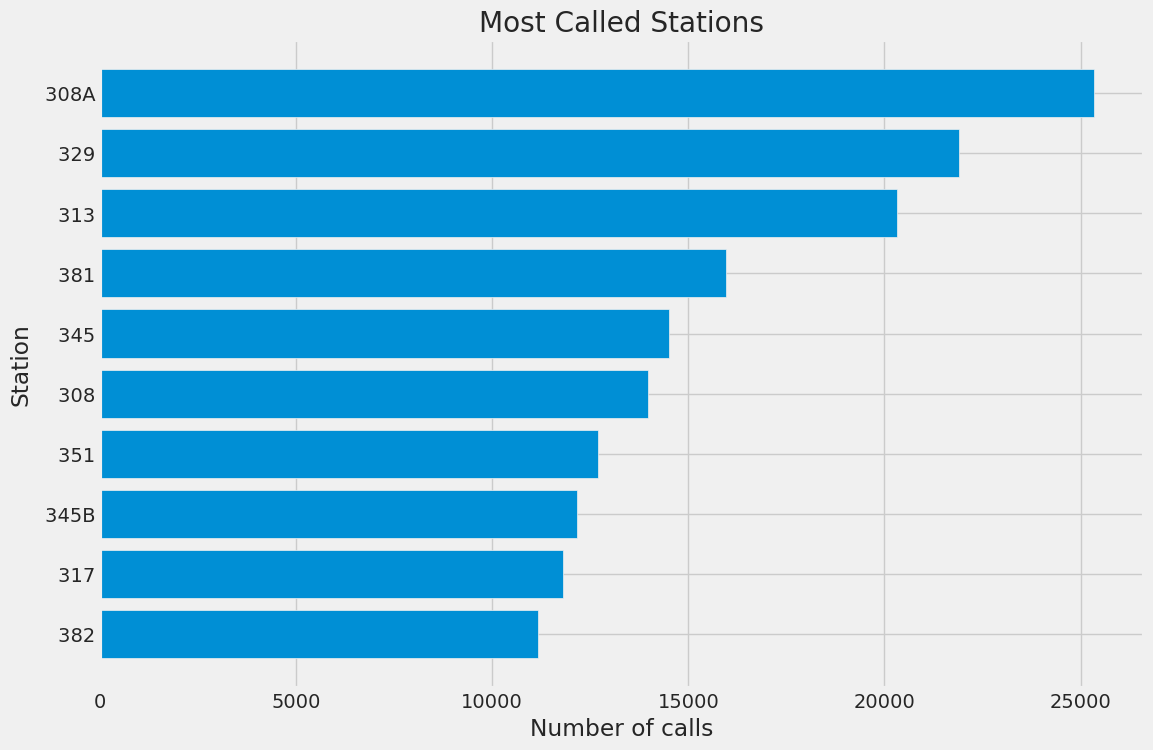

In [9]:
df = data.station_num.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

plt.barh(x, y)

### 📌 Note:
> - The `description` feature have a lot of important information (township, address, timestamp ...) but the station number is missing for the most of the emergency calls.
> - Most of the calls come from stations `308A`, `329`, `313`, `381`, and `317`

# 📍 "Zipcode"

In [10]:
print(data.zipcode.nunique())
print(data.zipcode.unique())

204
[19525. 19446. 19401.    nan 19044. 19426. 19438. 19462. 19428. 19040.
 19027. 18936. 18974. 19031. 19403. 19422. 19085. 18964. 19038. 19406.
 19468. 19010. 19095. 19464. 19444. 19041. 19440. 19405. 19002. 19096.
 19454. 19465. 19004. 19066. 19072. 18041. 19046. 19090. 19012. 19025.
 19473. 18073. 18969. 18074. 19460. 19001. 18054. 19009. 19006. 19035.
 19150. 19075. 19034. 19151. 19453. 19003. 18914. 19512. 18976. 19120.
 18915. 18076. 19477. 19087. 18966. 19131. 19128. 19083. 19053. 19475.
 18960. 19504. 18070. 19492. 18932. 19118. 18092. 19490. 19518. 18056.
 19119. 19107. 17752. 19111. 18927. 19435. 18951. 19472. 19503. 19126.
 19505. 19423. 19138. 36107. 18036. 19116. 19139. 19129. 19115. 19355.
 77316. 19457. 19082. 19127. 19443. 17555. 19520. 19063. 19020. 19404.
 19382. 19474. 19057. 19073. 19121. 18958. 19026. 19018. 19047. 19064.
 19602. 19486. 19348. 18051. 18049. 19333. 19144. 18101. 19607. 19450.
 19380. 17506.  8361. 18940. 18104.  7203. 19030.  8033. 19104. 17545.
  

In [11]:
data.zipcode.value_counts()

19401.00    45606
19464.00    43910
19403.00    34888
19446.00    32270
19406.00    22464
            ...  
77316.00        1
19134.00        1
19135.00        1
8502.00         1
18938.00        1
Name: zipcode, Length: 204, dtype: int64

❓ **What are the top 5 zipcodes for 911 calls?**

In [12]:
data.zipcode.value_counts().head()

19401.00    45606
19464.00    43910
19403.00    34888
19446.00    32270
19406.00    22464
Name: zipcode, dtype: int64

❓ **What are the top 5 townships (twp) for 911 calls?**

In [13]:
data.township.value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: township, dtype: int64

❓ **Take a look at the 'title' column, how many unique title codes are there?**

In [14]:
data.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [15]:
data.title.nunique()

148

#  Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are `EMS`, `Fire`, and `Traffic`. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [16]:
# data['Reason_category'] = data.title.apply(lambda title: title.split(': ')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [17]:
data['Reason_category'] = data.title.str.split(':', expand=True)[0]
data['Reason'] = data.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [18]:
print(data.Reason.value_counts())
print(data.Reason.nunique())

 VEHICLE ACCIDENT         184749
 DISABLED VEHICLE          47917
 FIRE ALARM                38452
 FALL VICTIM               34683
 RESPIRATORY EMERGENCY     34250
                           ...  
 ARMED SUBJECT                 2
 ANIMAL COMPLAINT              1
 PRISONER IN CUSTODY           1
 HIT + RUN                     1
 FOOT PATROL                   1
Name: Reason, Length: 88, dtype: int64
88


In [19]:
print(data.Reason_category.value_counts())
print(data.Reason_category.nunique())

EMS        332692
Traffic    230208
Fire       100622
Name: Reason_category, dtype: int64
3


<BarContainer object of 10 artists>

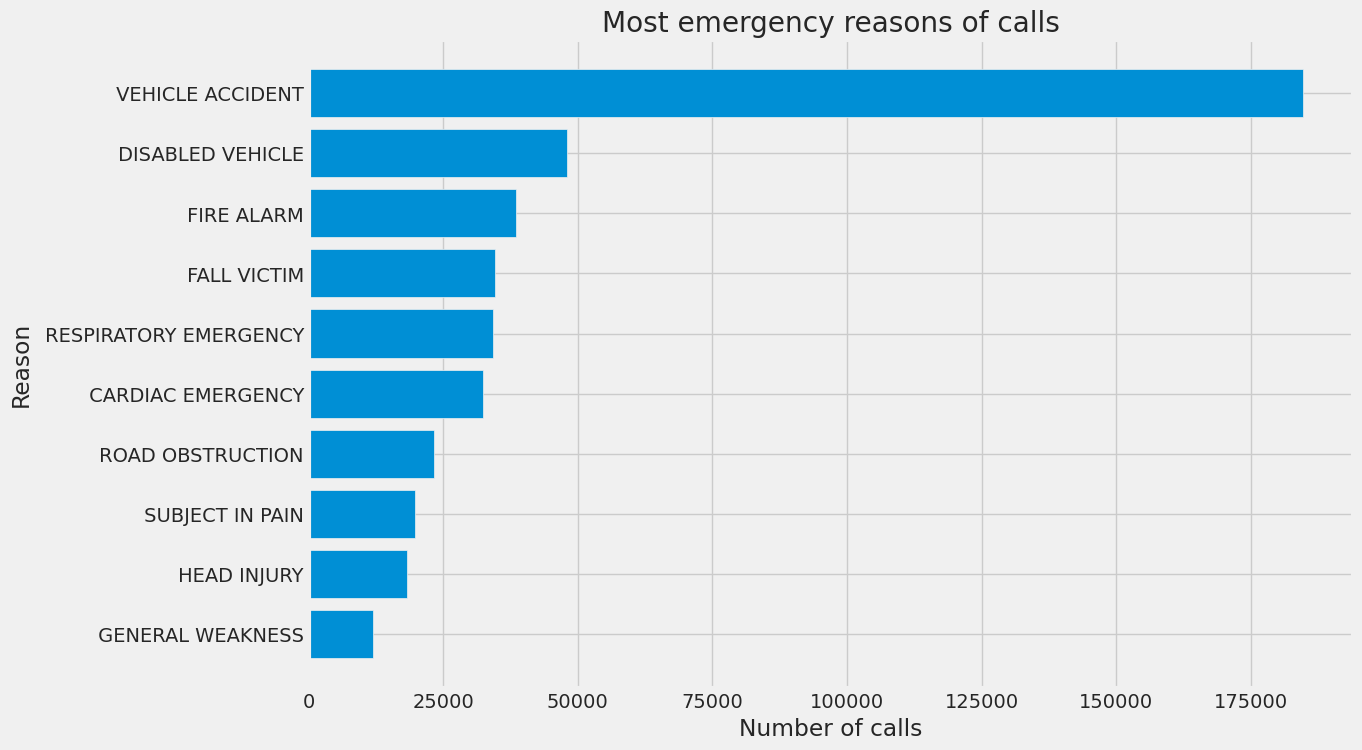

In [20]:
df = data.Reason.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason_category', ylabel='count'>

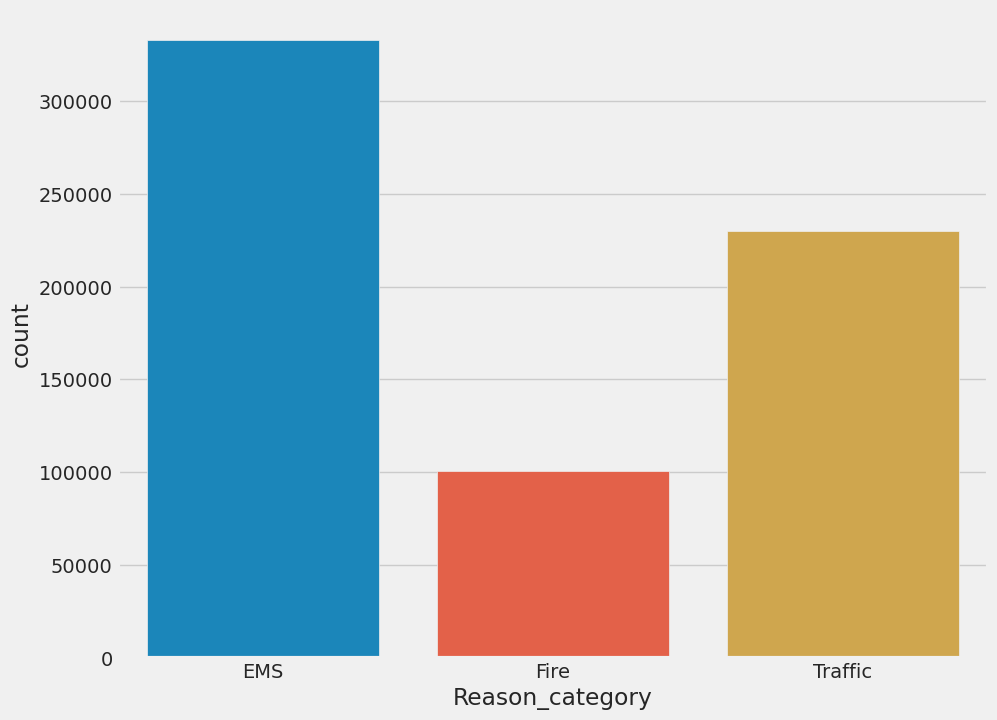

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Reason_category, data=data)

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [22]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS


In [23]:
data['timestamp'] = pd.to_datetime(data.timestamp)

In [24]:
data.timestamp

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timestamp, Length: 663522, dtype: datetime64[ns]

**You can now grab specific attributes from a Datetime object by calling them. For example:**
- `time = df['timeStamp'].iloc[0]`
- `time.hour`

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [25]:
data['Hour'] = data.timestamp.dt.hour
data['Month'] = data.timestamp.dt.month
data['DayOfWeek'] = data.timestamp.dt.weekday

In [26]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,17,12,3
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,17,12,3
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,14,12,3
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,16,12,3
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,16,12,3


The `description` feature isn't usefull anymore

In [27]:
data.drop('description', axis=1, inplace=True)

In [28]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DayOfWeek'] = data.DayOfWeek.map(dmap)
data.DayOfWeek.value_counts()

Fri    102942
Wed     99157
Thu     98683
Tue     97684
Mon     96745
Sat     89452
Sun     78859
Name: DayOfWeek, dtype: int64

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

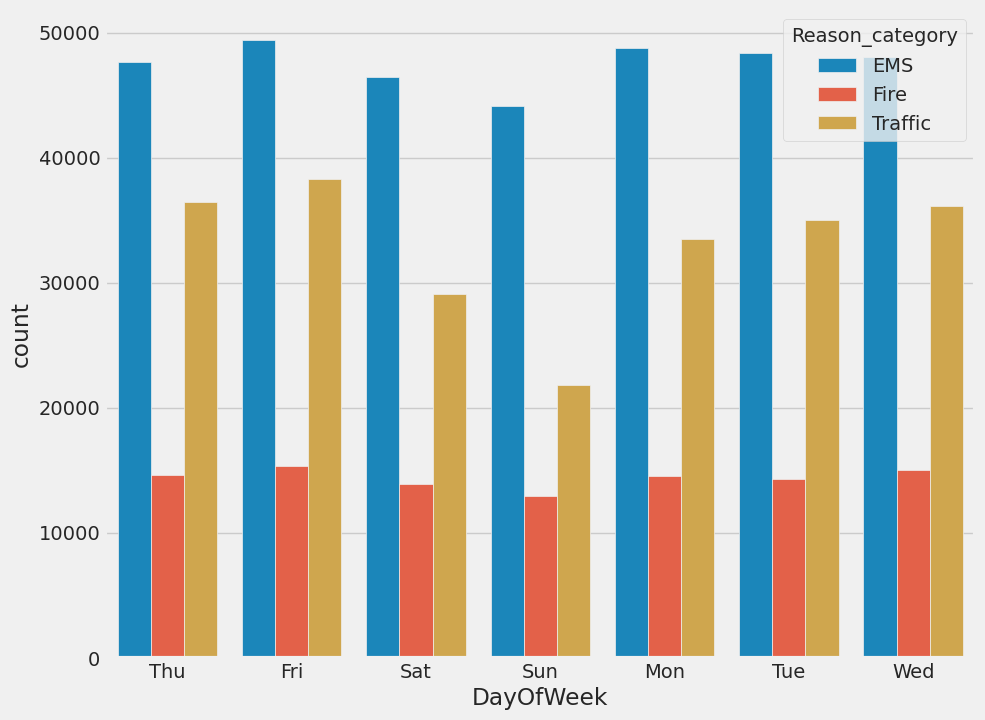

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.DayOfWeek, data=data, hue='Reason_category')

**Now do the same for Month:**

<AxesSubplot:xlabel='Month', ylabel='count'>

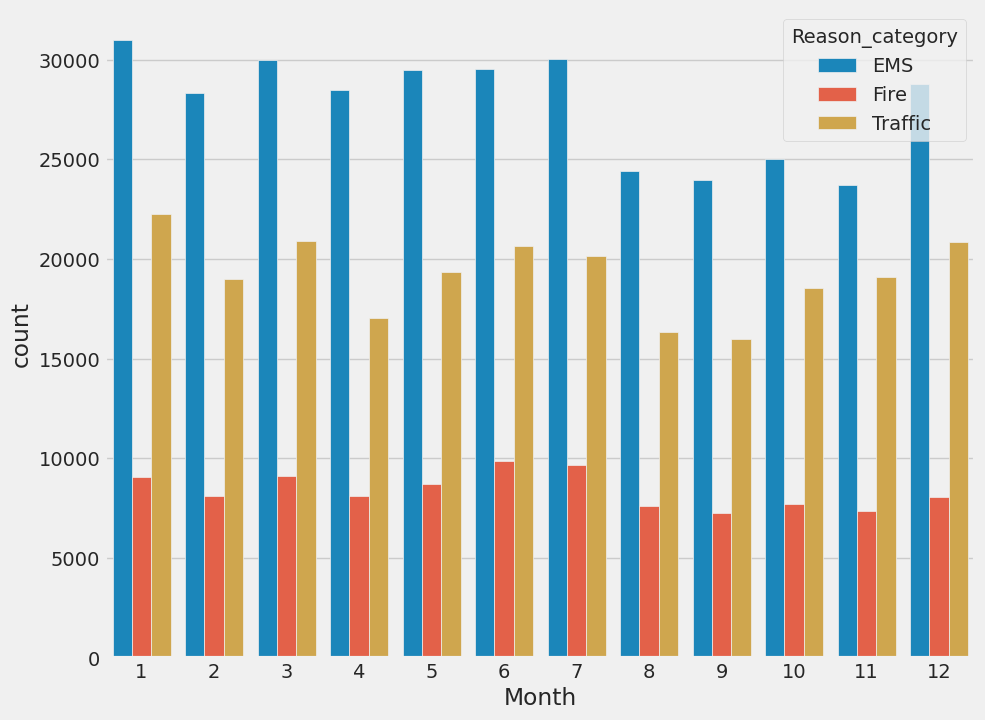

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Month, data=data, hue='Reason_category')

**Did you notice something strange about the Plot?**

_____

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [31]:
byMonth = data.groupby('Month').count()
byMonth

,latitude,longitude,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,55294,62336,62336,62312,62336,40057,62336,62336,62336,62336
2,55427,55427,48922,55427,55427,55405,55427,36421,55427,55427,55427,55427
3,60027,60027,53252,60027,60027,60001,60027,39124,60027,60027,60027,60027
4,53671,53671,47349,53671,53671,53655,53671,36617,53671,53671,53671,53671
5,57509,57509,50354,57509,57509,57474,57509,38164,57509,57509,57509,57509
6,60034,60034,52593,60034,60034,60005,60034,39391,60034,60034,60034,60034
7,59832,59832,52507,59832,59832,59802,59832,39692,59832,59832,59832,59832
8,48359,48359,42311,48359,48359,48335,48359,32008,48359,48359,48359,48359
9,47213,47213,41289,47213,47213,47196,47213,31240,47213,47213,47213,47213


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='Month'>

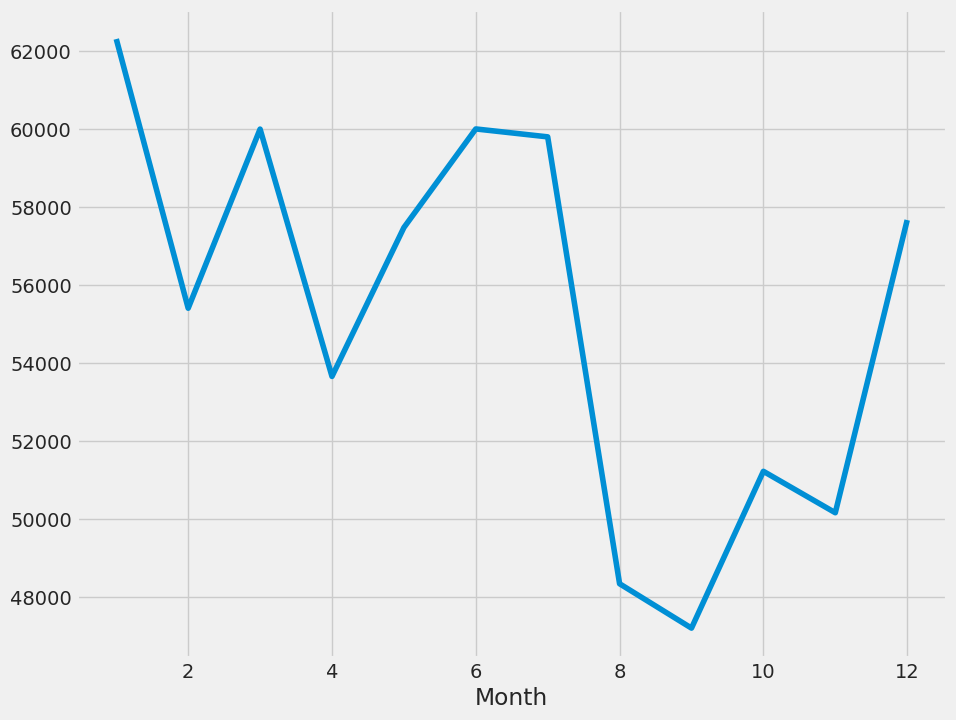

In [32]:
byMonth.township.plot(figsize=(10, 8))

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

<Figure size 1200x800 with 0 Axes>

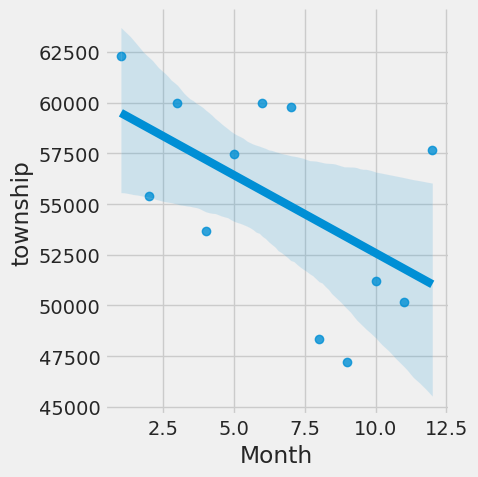

In [33]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Month',y='township',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [34]:
data['Date'] = data.timestamp.dt.date
data.Date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [35]:
byDate = data.groupby("Date").count()
byDate.head()

,latitude,longitude,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,114,114,100,114,114,114,114,73,114,114,114,114,114
2015-12-11,391,391,332,391,391,391,391,254,391,391,391,391,391
2015-12-12,402,402,334,402,402,402,402,257,402,402,402,402,402
2015-12-13,316,316,279,316,316,316,316,241,316,316,316,316,316
2015-12-14,444,444,386,444,444,443,444,260,444,444,444,444,444


<AxesSubplot:xlabel='Date'>

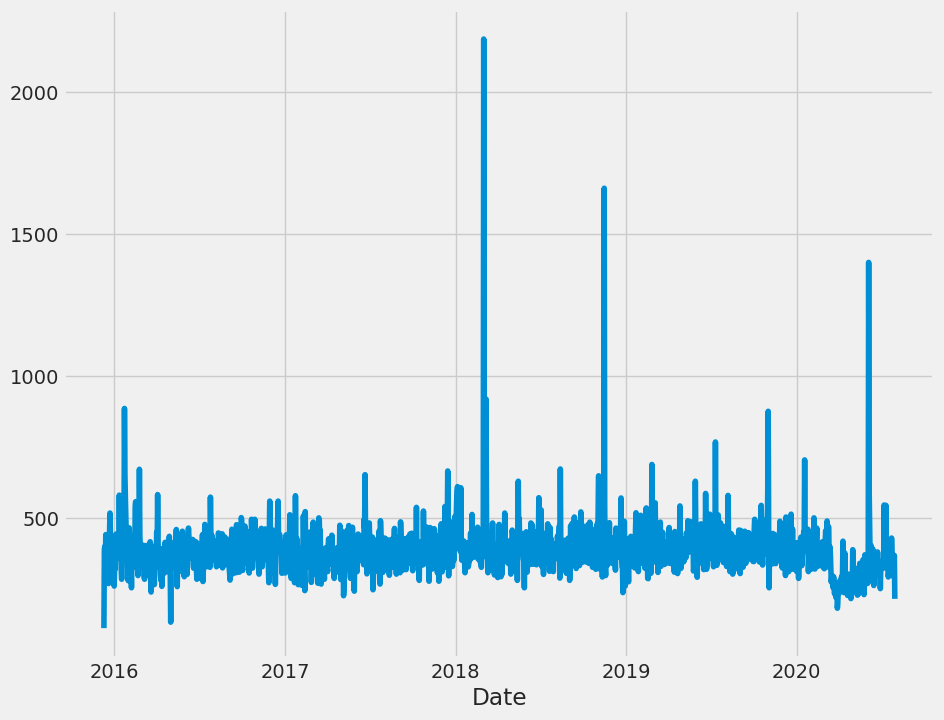

In [36]:
byDate.township.plot(figsize=(10, 8))

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

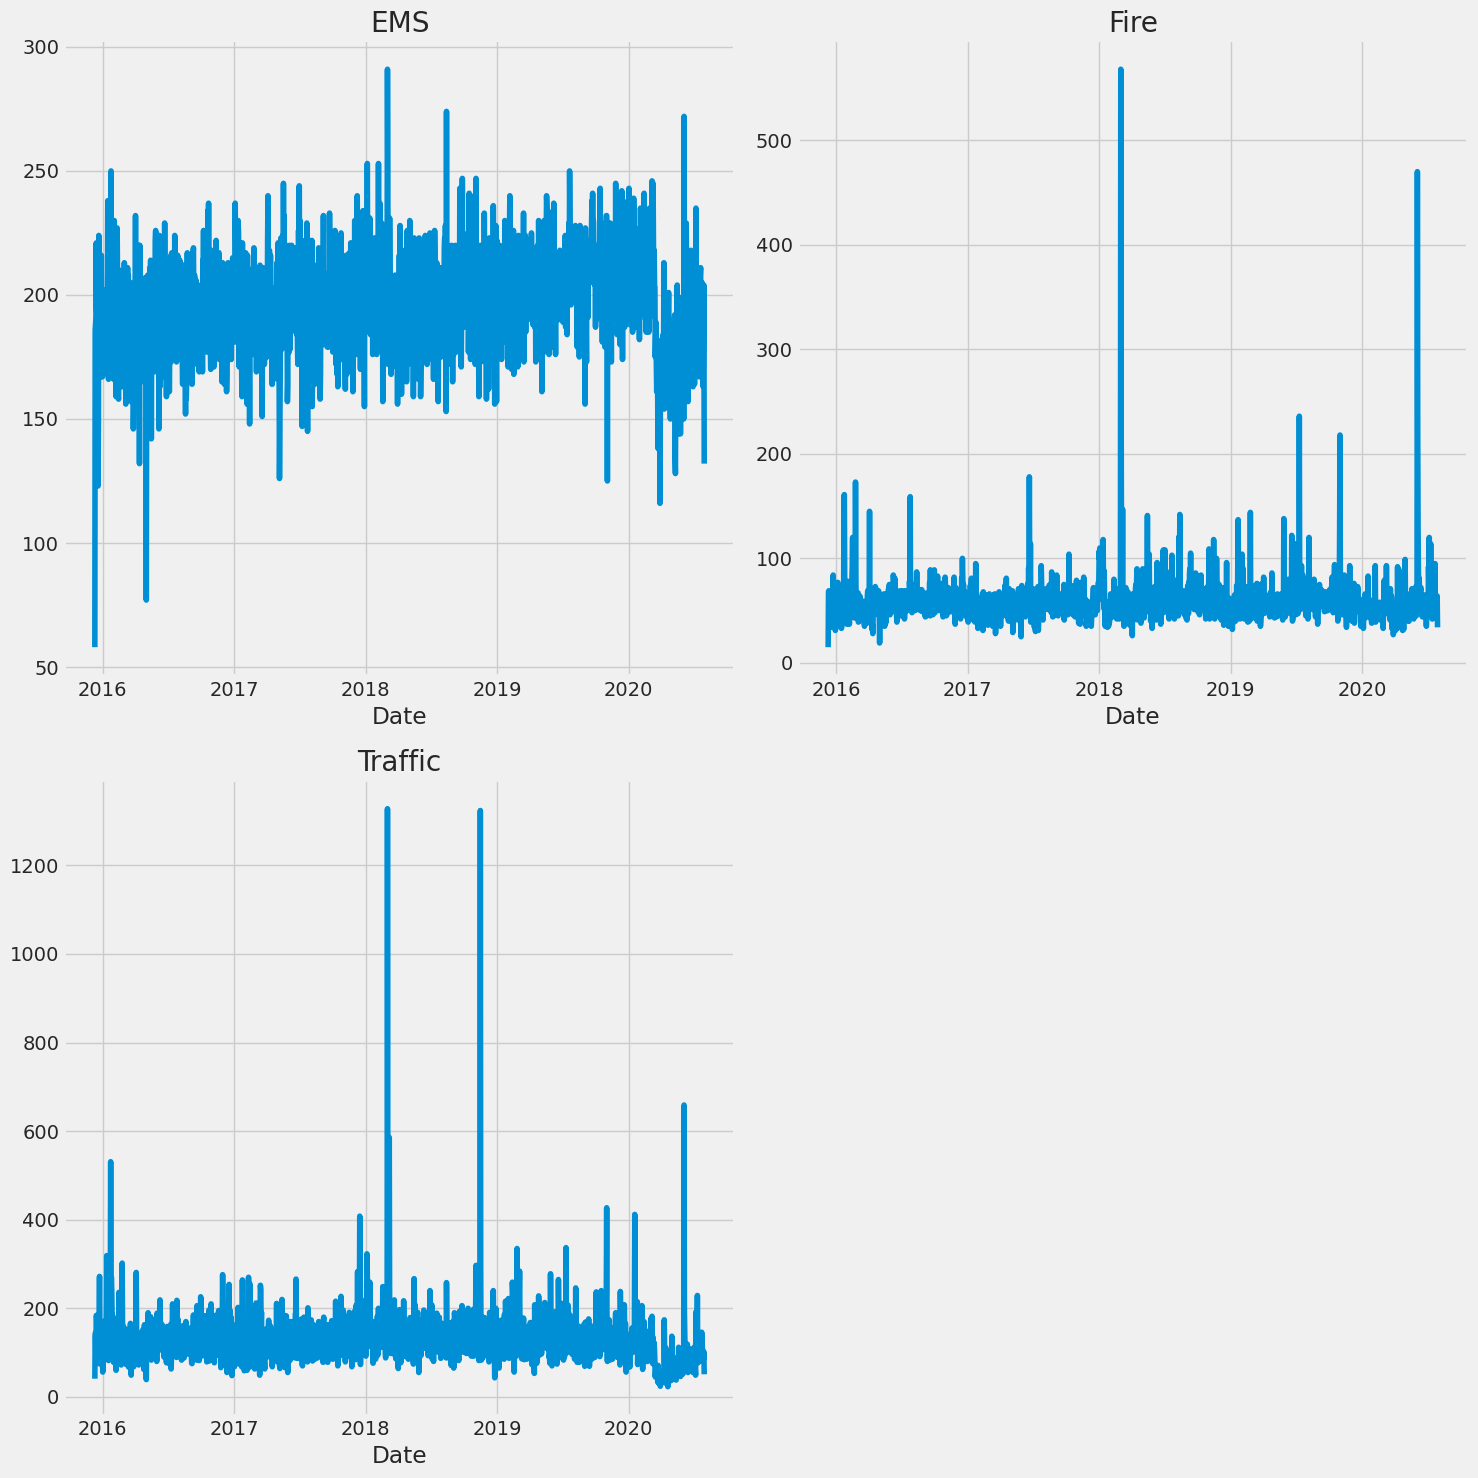

In [37]:
plt.figure(figsize=(15, 15))

for i, reason in enumerate(data.Reason_category.unique(), 1):
    plt.subplot(2, 2, i)
    data[data['Reason_category']==reason].groupby('Date').count()['township'].plot()
    plt.title(reason)
    plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [38]:
dayHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason_category'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

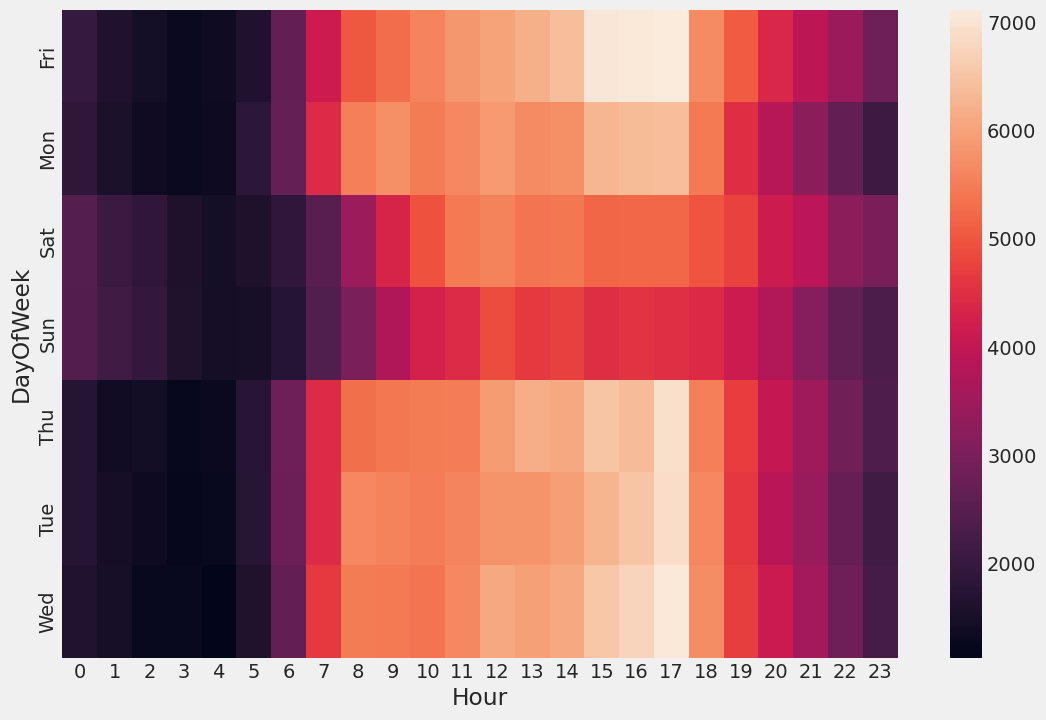

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour)

**Now create a clustermap using this DataFrame.**

<Figure size 1200x800 with 0 Axes>

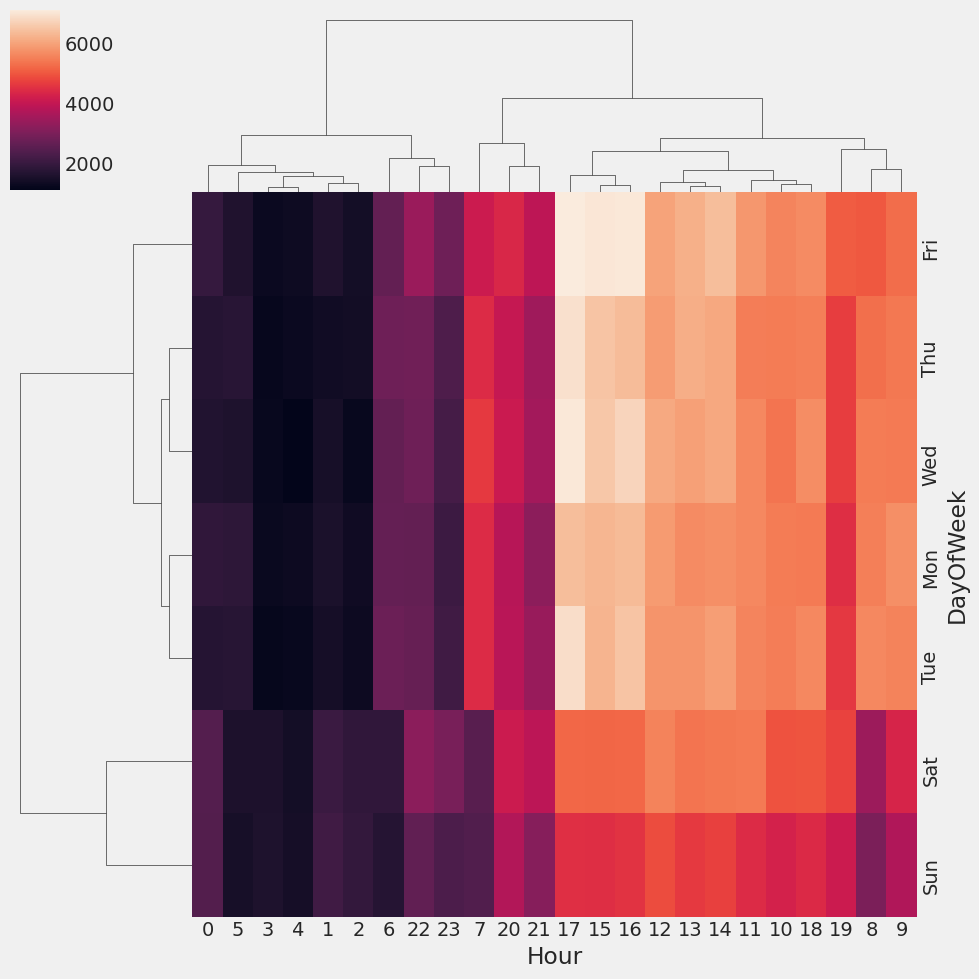

In [40]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayHour)

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [41]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['Reason_category'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='DayOfWeek'>

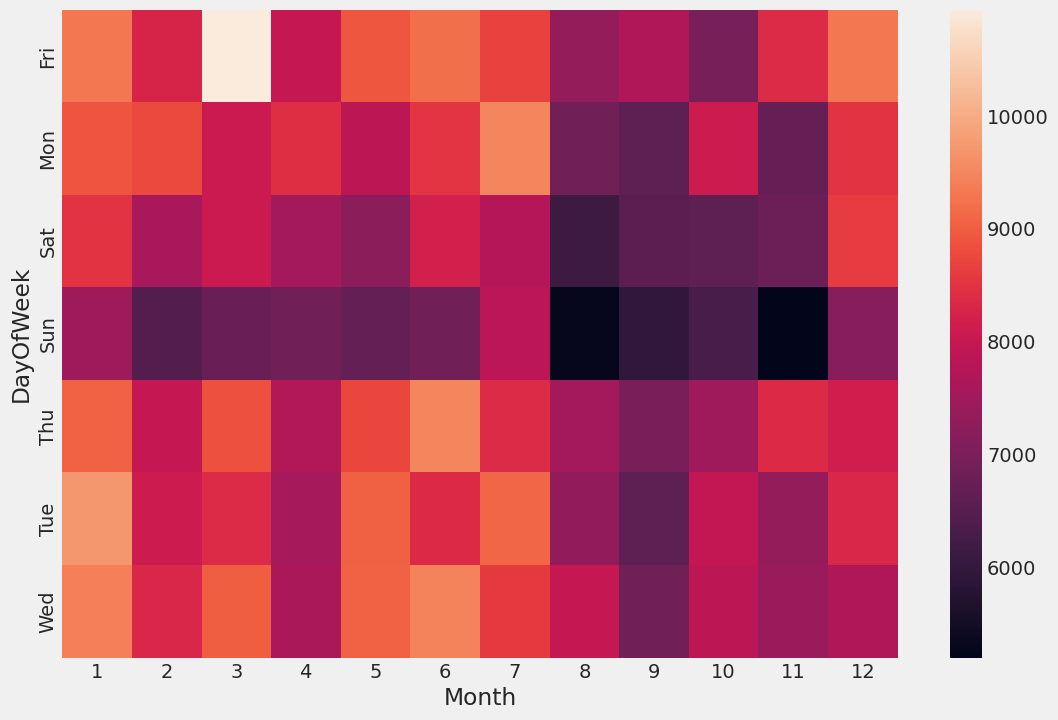

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayMonth)

<Figure size 1200x800 with 0 Axes>

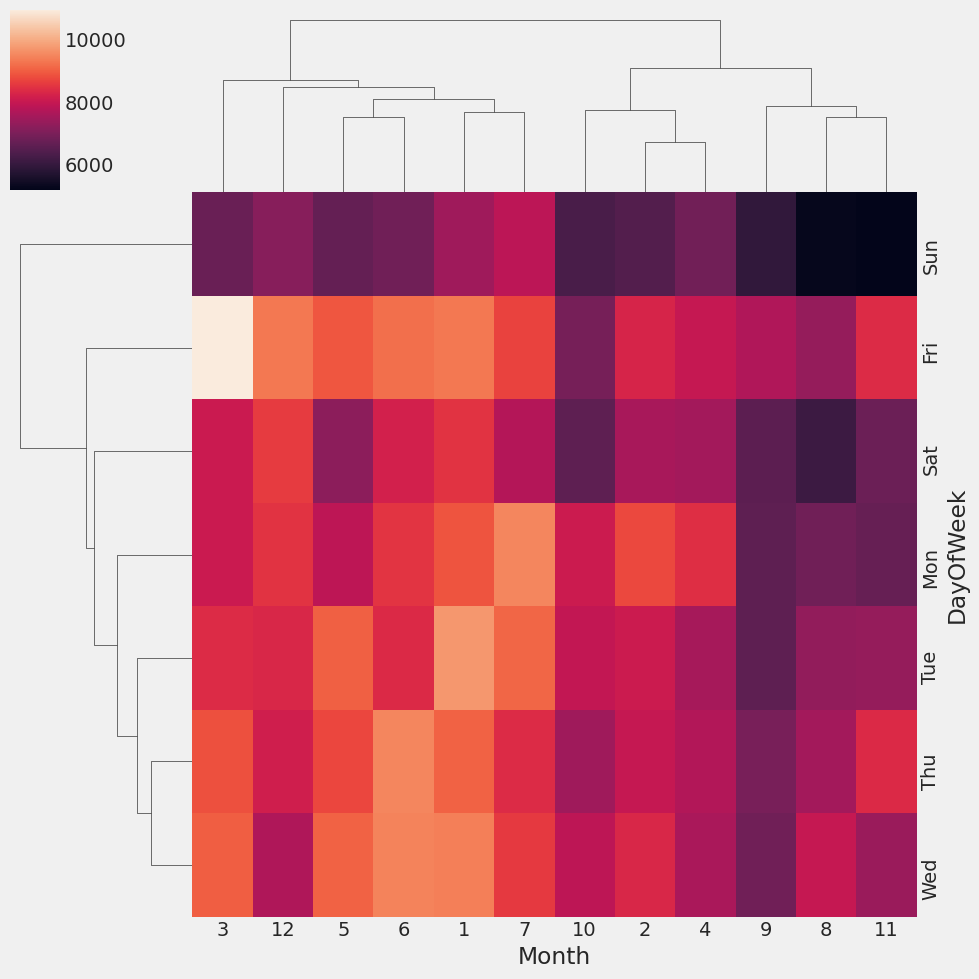

In [43]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayMonth)

## Longitude and Latitude

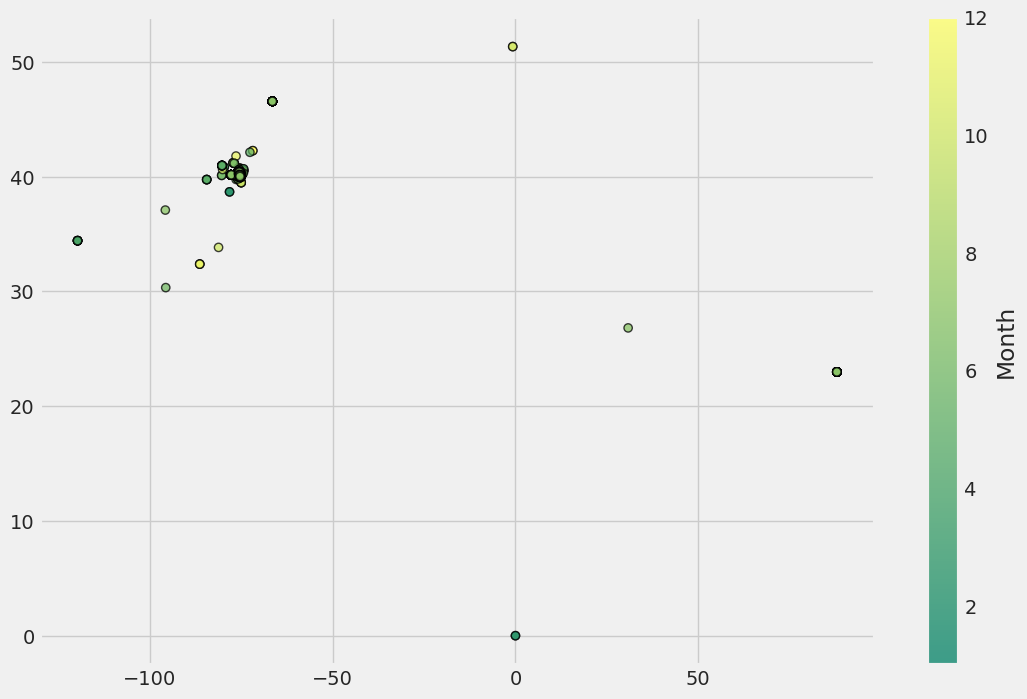

In [44]:
plt.figure(figsize=(12, 8))
plt.scatter(data.longitude, data.latitude, c=data.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')

In [45]:
data.head()

,latitude,longitude,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek,Date
0,40.30,-75.58,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10
1,40.26,-75.26,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10
2,40.12,-75.35,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,14,12,Thu,2015-12-10
3,40.12,-75.34,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,16,12,Thu,2015-12-10
4,40.25,-75.60,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,16,12,Thu,2015-12-10
